# Cenário I



## Objetivo
Relatar e investigar anomalias encontradas.



In [262]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
from zipfile import ZipFile

#### Abrindo e lendo o arquivo

In [263]:
warnings.filterwarnings("ignore")  
arquivo = ZipFile('/content/drive/MyDrive/Colab Notebooks/Lambda3/Teste 1/teste_eng_dados_sample.zip', 'r')
arquivo.extractall()
arquivo.close()

In [264]:
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Lambda3/Teste 1/teste_eng_dados_sample/sample.xls', sheet_name=None)

### 1 - Resumo Geral

In [265]:
dataset.keys()

dict_keys(['Orders', 'Returns', 'People'])

In [266]:
df_orders = dataset['Orders']   # dataframe de orders
df_returns = dataset['Returns'] # dataframe de return
df_people = dataset['People']   # dataframe de people

print(f'Número de registros: {df_orders.shape[0]}, Número de variáveis: {df_orders.shape[1]}')
print(f'Número de registros: {df_returns.shape[0]}, Número de variáveis: {df_returns.shape[1]}')
print(f'Número de registros: {df_people.shape[0]}, Número de variáveis: {df_people.shape[1]}')

Número de registros: 9994, Número de variáveis: 21
Número de registros: 296, Número de variáveis: 2
Número de registros: 4, Número de variáveis: 2


In [267]:
print('df_orders \n\n',df_orders.dtypes, '\n\ndf_returns \n', df_returns.dtypes, '\n\ndf_peoples \n', df_people.dtypes)


df_orders 

 Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object 

df_returns 
 Returned    object
Order ID    object
dtype: object 

df_peoples 
 Person    object
Region    object
dtype: object


 **Temos as seguintes variáveis:**

- **Características Gerais dos clientes**
  - Customer ID - ID dos clientes
  - Customer Name - Nome dos Clientes
  - Segment - Consumidor, Corporativo, Escritório em casa
  - Country - Estados Unidos
  - City - Cidades
  - State - Estado
  - Postal Code - Código Postal
  - Region - (Leste, Oeste, Norte e Sul)
  - Person - Pessoa

<br>

- **Datas:**
  - Order Date - Data do pedido
  - Ship Date - Data de envio do pedido

<br>

- **Pedidos:**
  - Order ID - Número do Pedidos
  - Ship Mode - Primeira Classe, Mesmo Dia, Segunda Classe e Classe Padrão 

<br>

- **Perfil do Pedido:**
  - Product ID - ID do Produto
  - Category - Categoria do Produto
  - Sub-Category - Sub-Categoria
  - Product Name - Nome da Categoria
  - Sales - Vendas
  - Quantity - Quantidade de produto vendido no pedido
  - Discount - Desconto no pedido
   -Profit - Lucro no Pedido

<br>


#### Adicionando uma coluna de "Returns"

Adicionar uma coluna 'returns' no df_orders para verificação das devoluções.


In [268]:
df_orders['Returns'] = df_orders['Order ID'].apply(lambda x: 'yes' if x in df_returns['Order ID'].values else 'no')
df_orders['Returns'].head()

0    no
1    no
2    no
3    no
4    no
Name: Returns, dtype: object

#### Transformação do CEP em String 

In [269]:
#transformando CEP em string para não sujar as análises
df_orders['Postal Code'] = df_orders['Postal Code'].astype('str') 

#### Criação de da coluna tempo de espera

O tempo de espera demonstra o tempo que o pedido demora para ser enviado.

In [270]:
df_orders['Waiting Time'] = (df_orders['Ship Date'] - df_orders['Order Date'])
df_orders['Waiting Time'].head()

0   3 days
1   3 days
2   4 days
3   7 days
4   7 days
Name: Waiting Time, dtype: timedelta64[ns]

#### Ordernar o df_orders a partir das datas de pedido

Ordenação do df_orders a partir das datas de pedido para analisar a série temporal dos dados.

In [271]:
df_orders = df_orders.sort_values(by='Order Date')
df_orders.reset_index(inplace=True, drop=True)
df_orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returns,Waiting Time
0,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,no,4 days
1,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,no,4 days
2,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,no,4 days
3,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,no,4 days
4,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,no,7 days


##### Análise para ver se tem dados faltantes

In [272]:
df_orders.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Returns          0
Waiting Time     0
dtype: int64


#### Remoção de colunas:

  - Foram removidas as seguintes colunas: Row Id e Country. Estas não influenciam nas análises.

In [273]:
df_orders = df_orders.drop(columns=['Row ID'])
df_orders = df_orders.drop(columns=['Country'])
df_orders.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returns,Waiting Time
0,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,no,4 days
1,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,no,4 days
2,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,no,4 days
3,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,no,4 days
4,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,no,7 days


#### Temos agora um DataFrame completo!

In [274]:
df = df_orders

In [275]:
print(f'A base de dados apresenta {df.shape[0]} e {df.shape[1]} variáveis.')

A base de dados apresenta 9994 e 21 variáveis.


In [276]:
round(df.describe(),2)

,Sales,Quantity,Discount,Profit,Waiting Time
count,9994.00,9994.00,9994.00,9994.00,9994
mean,229.86,3.79,0.16,28.66,3 days 22:59:46.311787072
std,623.25,2.23,0.21,234.26,1 days 17:56:29.766161104
min,0.44,1.00,0.00,-6599.98,0 days 00:00:00
25%,17.28,2.00,0.00,1.73,3 days 00:00:00
50%,54.49,3.00,0.20,8.67,4 days 00:00:00
75%,209.94,5.00,0.20,29.36,5 days 00:00:00
max,22638.48,14.00,0.80,8399.98,7 days 00:00:00


In [277]:
customer = sorted(list(df['Customer Name'].unique()))
shipmode = sorted(list(df['Ship Mode'].unique()))
city = sorted(list(df_orders['City'].unique()))
state = sorted(list(df['State'].unique()))
region = sorted(list(df['Region'].unique()))
category = sorted(list(df['Category'].unique()))
sub_category = sorted(list(df['Sub-Category'].unique()))
product_name = sorted(list(df['Product Name'].unique()))

print(f'São {len(customer)} clientes em todo EUA.\nOs clientes estão espalhados em {len(state)} estados e em {len(city)} cidades, divididos em {len(region)} regiões.\n')
print(f'Pode-se verificar que existem {len(product_name)} produtos, divididos em {len(sub_category)} sub-cateorias e {len(category)} categorias.')

São 793 clientes em todo EUA.
Os clientes estão espalhados em 49 estados e em 531 cidades, divididos em 4 regiões.

Pode-se verificar que existem 1850 produtos, divididos em 17 sub-cateorias e 3 categorias.


### Analise dos Pedidos

In [278]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returns,Waiting Time
0,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,no,4 days
1,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,no,4 days


In [279]:
counts_shipmode = df['Ship Mode'].value_counts()
counts_segment = df['Segment'].value_counts()
counts_region = df['Region'].value_counts()
counts_category = df['Category'].value_counts()

Podemos analisar a densidade dos dados em cada um dos conjuntos destacados🇰

* shipmode 
* segment 
* category
* region


Percebe-se que existe um padrão na curva da densidade com uma diferença 'region'.

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64


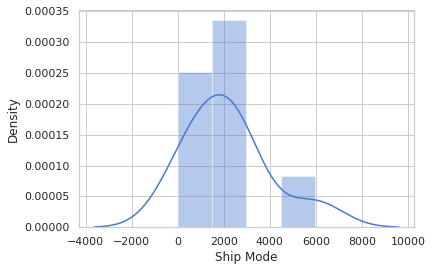

In [280]:
sns.set(style="whitegrid", palette="muted"  )                 
sns.distplot(counts_shipmode.describe(),kde = True)
print(counts_shipmode)

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


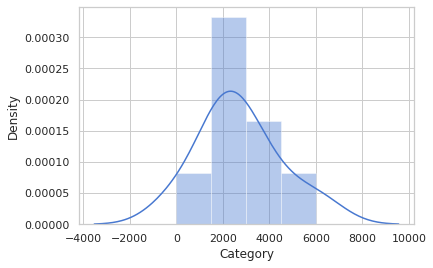

In [281]:
sns.set(style="whitegrid", palette="muted"  )                 
sns.distplot(counts_category.describe(),kde = True)  
print(counts_category)

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64


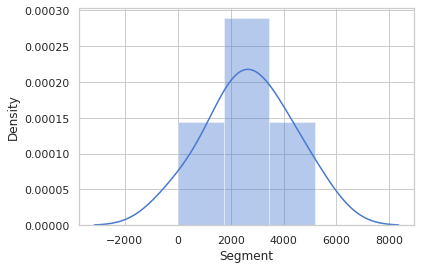

In [282]:
sns.set(style="whitegrid", palette="muted"  )                 
sns.distplot(counts_segment.describe(),kde = True) 
print(counts_segment)

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64


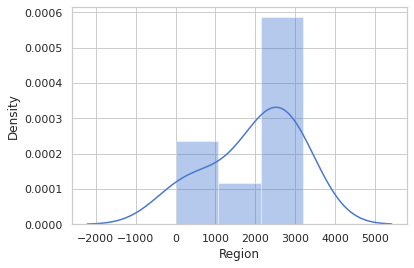

In [283]:
sns.set(style="whitegrid", palette="muted"  )                 
sns.distplot(counts_region.describe(),kde = True) 
print(counts_region)


count       4.000000
mean     2498.500000
std       688.242448
min      1620.000000
25%      2147.250000
50%      2585.500000
75%      2936.750000
max      3203.000000
Name: Region, dtype: float64


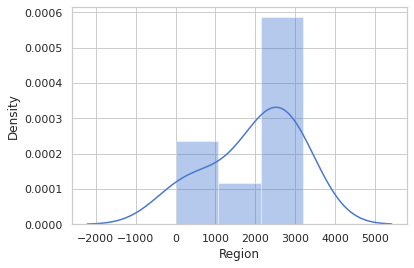

In [284]:
cs = counts_region.describe()
print(cs)
sns.set(style="whitegrid", palette="muted"  )                 
sns.distplot(cs,kde = True)  

#### Gráfico de Correlação

Como as variáveis numéricas estão correlacionas?

Pode-se destacar que mesmo com um valor de 0.48 as vendas estão ligadas diretamente ao lucro.

Outro ponto a se destacar é a relação inversa entre o desconto e o lucro. 

As outras relações estão muito próximas de 0, fazendo com que as variáveis não tenham uma relação direta.


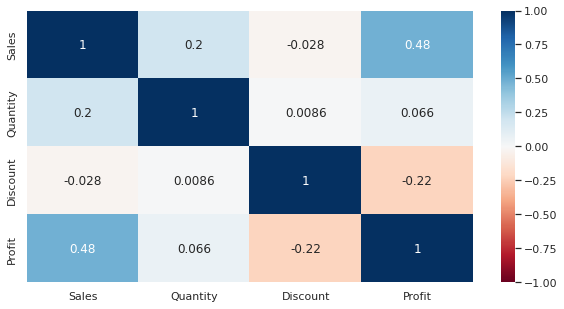

In [285]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap="RdBu", vmin=-1, annot=True)

#### Gráficos de Pedidos em Relação as variáveis classe de envio, região, segmento e categoria.

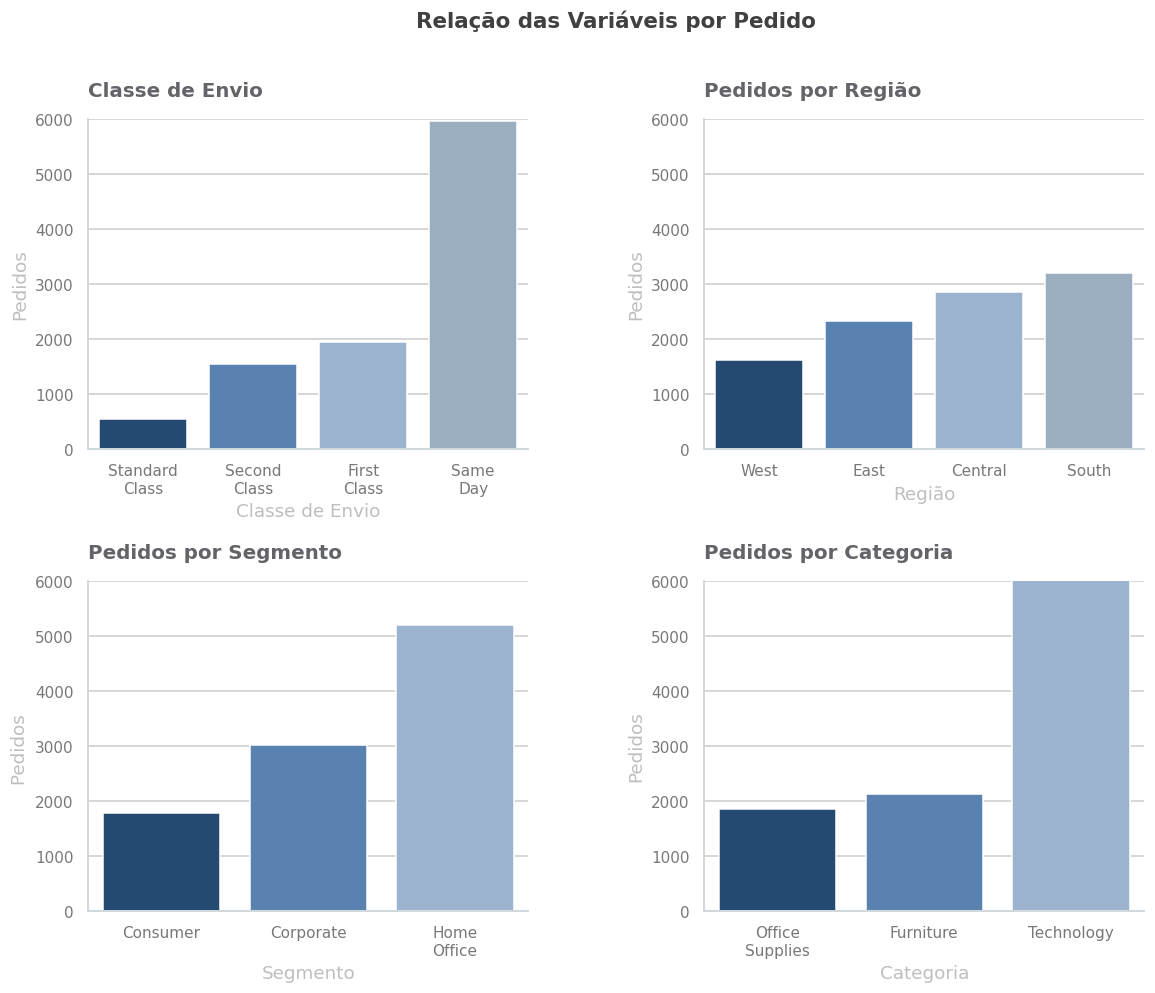

In [286]:
pos = [[0,0],[0,1],[1,0],[1,1]]   # posições dos gráficos
palette1 = ['#174A7E','#4A81BF','#94B2D7','#94AFC5','#03045e']  # paleta de cores usada

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(12,9),       # (largura, altura) em polegadas 
                       dpi=110)                                   # resolução (pontos/polegada)

fig.suptitle('Relação das Variáveis por Pedido', fontsize=14,y= 1.01,weight = 'bold', color = '#414040')

## Figura 1- Quantidade de envios por classe
## Informação:
d1 = counts_shipmode

## gráfico
sns.barplot(x=d1.index, y=df['Ship Mode'],  palette=palette1, data=d1, ax=ax[0,0])
new_indices = [line.replace(' ','\n') for line in d1.index]
ax[0,0].axis(ymin=0,ymax=6000)
ax[0,0].set_title('Classe de Envio', color='#646369', loc='left', pad=15, fontsize=13, weight='bold')
ax[0,0].set_xlabel('Classe de Envio', color='#BFBEBE')
ax[0,0].set_ylabel('Pedidos', color='#BFBEBE')
ax[0,0].set_xticklabels(new_indices)

## Figura 2- Quantidade de pedidos por região
## Informação:
d2 = counts_region

## gráfico
sns.barplot(x=d2.index, y=df['Region'],  palette=palette1, data=d2, ax=ax[0,1])
new_indices = [line.replace(' ','\n') for line in d2.index]
ax[0,1].axis(ymin=0, ymax=6000)
ax[0,1].set_title('Pedidos por Região', color='#646369', loc='left', pad=15, fontsize=13, weight='bold')
ax[0,1].set_xlabel('Região',color='#BFBEBE')
ax[0,1].set_ylabel('Pedidos',color='#BFBEBE')
ax[0,1].set_xticklabels(new_indices)

## Figura 3 - Quantidade de pedidos por Segmento
## Informação:
d3 = counts_segment

## gráfico
sns.barplot(x=d3.index, y=df['Segment'],  palette=palette1, data=d3, ax=ax[1,0])
new_indices = [line.replace(' ','\n') for line in d3.index]
ax[1,0].axis(ymin=0, ymax=6000)
ax[1,0].set_title('Pedidos por Segmento', color='#646369', loc='left', pad=15, fontsize=13, weight='bold')
ax[1,0].set_xlabel('Segmento',color='#BFBEBE')
ax[1,0].set_ylabel('Pedidos ',color='#BFBEBE')
ax[1,0].set_xticklabels(new_indices)
ax[1,0].set_xticklabels(new_indices)

## Figura 4 - Quantidade de pedidos por Categoria
## Informação:
d4 = counts_category

## gráfico
sns.barplot(x=d4.index, y=df['Category'],  palette=palette1, data=d4, ax=ax[1,1])
new_indices = [line.replace(' ','\n') for line in d4.index]
ax[1,1].axis(ymin=0, ymax=6000)
ax[1,1].set_title('Pedidos por Categoria', color='#646369', loc='left', pad=15, fontsize=13, weight='bold')
ax[1,1].set_xlabel('Categoria',color='#BFBEBE')
ax[1,1].set_ylabel('Pedidos',color='#BFBEBE')
ax[1,1].set_xticklabels(new_indices)

### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines

fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

Pode-se perceber que a maioria dos pedidos acontecem no mesmo dia. 

Os produtos mais procurados são de tecnologia e sendo do segmento home-office. 

Cada região tem uma quantidade próxima de pedidos.

#### Tempo para envio

In [287]:
df['Waiting Time'] = df['Ship Date'] - df['Order Date']

Precisa transformar a coluna wating time em uma lista com inteiros para poder fazer o histograma.

count    9994.000000
mean        3.958175
std         1.747567
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Waiting Time, dtype: float64


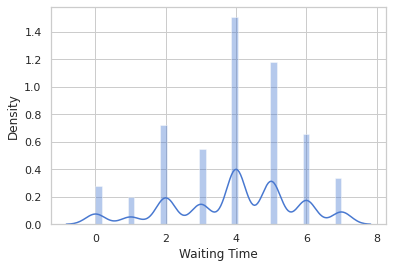

In [288]:
wt = pd.to_numeric(df['Waiting Time'].dt.days, downcast='integer')
print(wt.describe())
sns.set(style="whitegrid", palette="muted")                 
sns.distplot(wt,kde = True)                   

Neste caso a média para o envio do produto é de 4 dias. 

#### Analisando numeros agrupados

### Vamos analisar as compras

In [289]:
df_gname = df.groupby('Customer Name').sum()
df_gday = df.groupby('Order Date').sum()
df_gcity = df.groupby('City').sum()
df_gstate = df.groupby('State').sum()
df_gsegment = df.groupby('Segment').sum()
df_gcategory = df.groupby('Category').sum()
df_gsub = df.groupby('Sub-Category').sum()
df_gcategory = df.groupby('Category').sum()
df_greturns = df.groupby('Returns').sum()

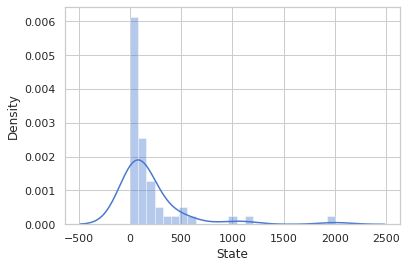

In [290]:
sns.set(style="whitegrid", palette="muted"  )                 
sns.distplot(df['State'].value_counts(),kde = True)                   

#### Gráfico Da série temporal da relação entre vendas e lucro.

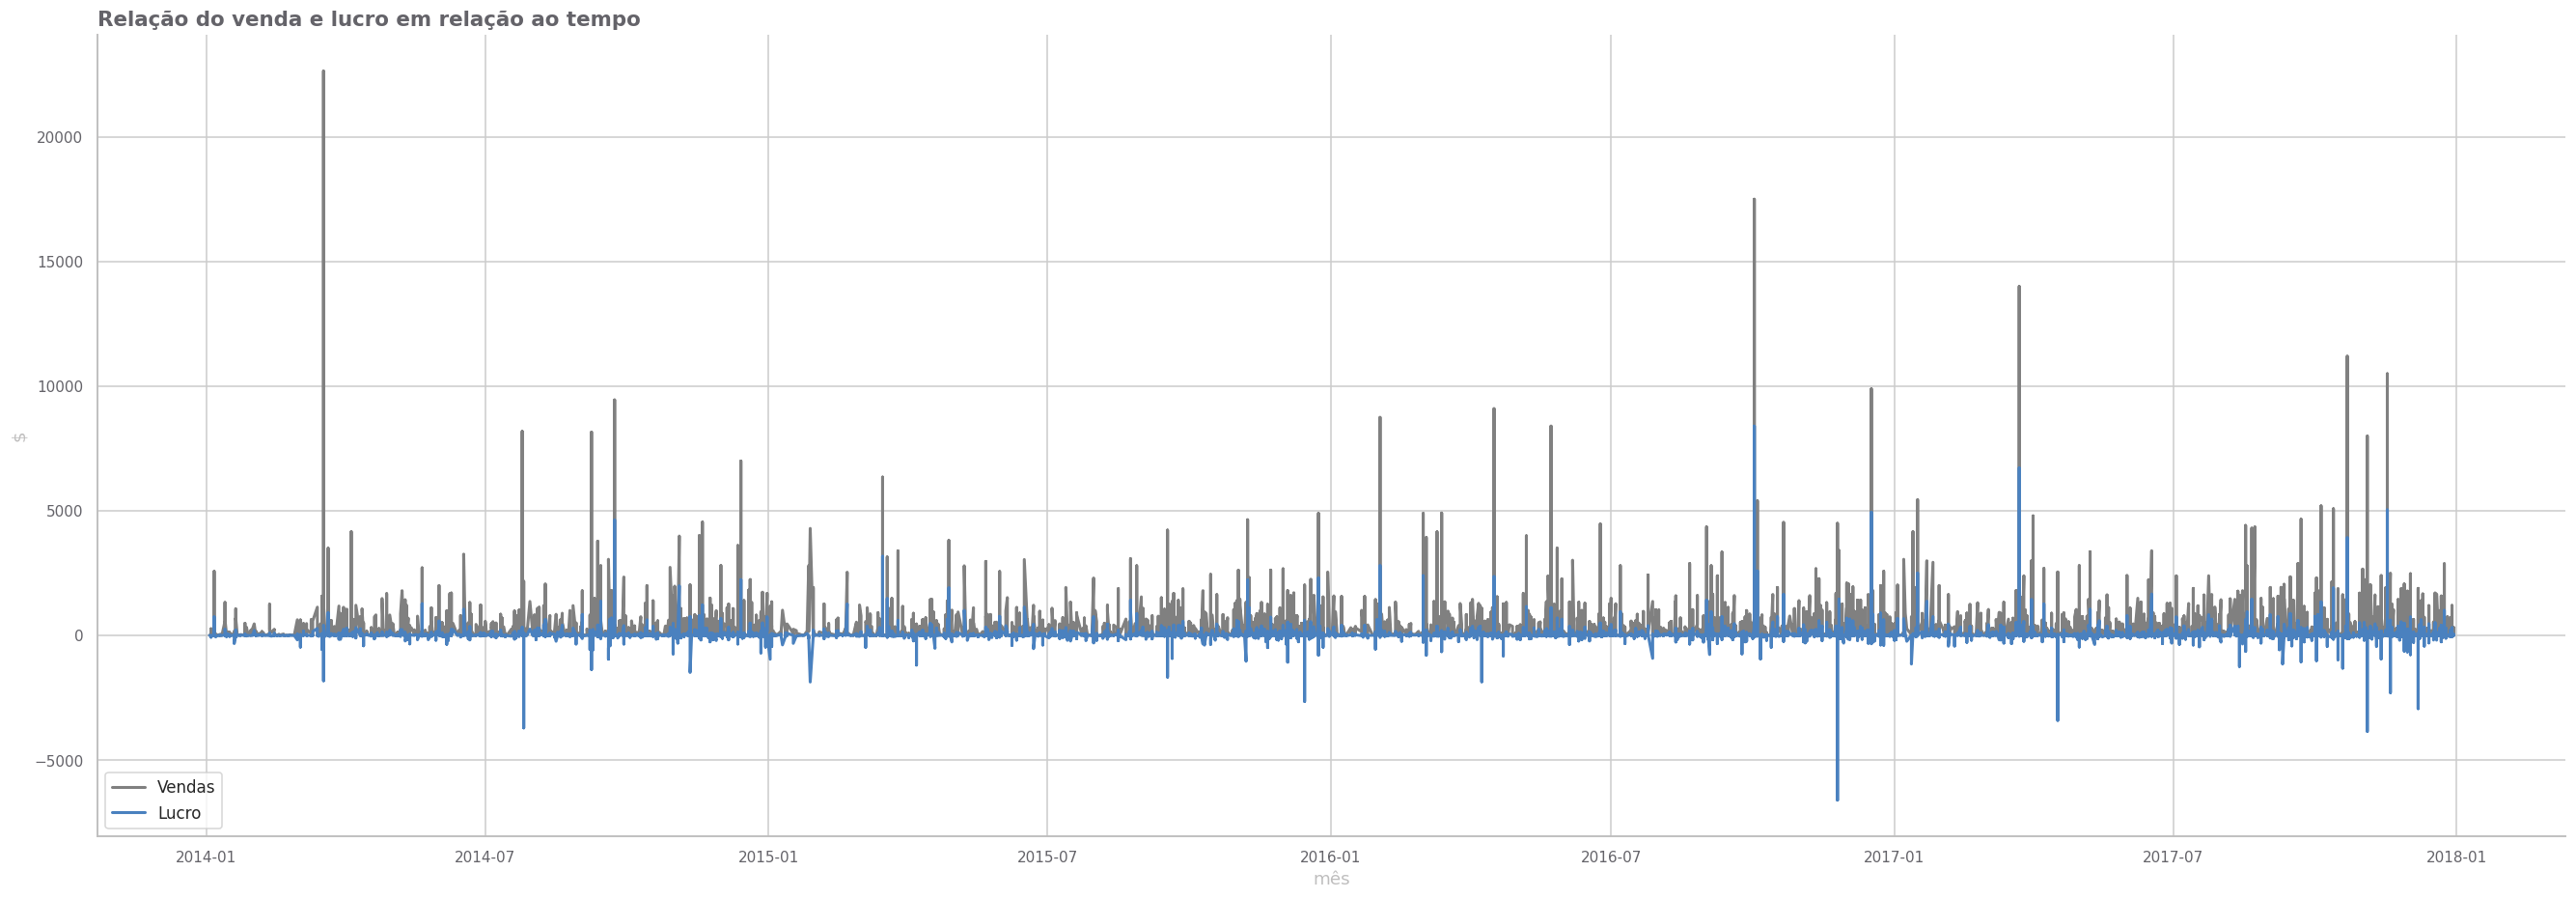

In [291]:
# Gráfico de Linhas - Uma série temporal

# ---------------------------------------------------------------------------------------
#                             Elementos básicos:
# ---------------------------------------------------------------------------------------

# 1 - Figure e axis
# Criando a variável fig e a variável ax   (figura, eixos):               
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30,10),  # (largura, altura) em polegadas 
                       dpi=110)
# 2 - Gráfico de linhas - coluna Mês (x), Lucro (y) de df1 
ax.plot('Order Date', 'Sales', data=df, color='grey', lw=2, label='Vendas')
ax.plot('Order Date', 'Profit', data=df, color='#4A81BF', lw=2, label='Lucro')
plt.legend(loc='lower left')

# 3 - Título
ax.set_title('Relação do venda e lucro em relação ao tempo', color = '#646369',loc='left', fontsize=14, weight='bold')


# 4 - Adicionar o label
ax.set_xlabel('mês',color='#BFBEBE')
ax.set_ylabel('$',color='#BFBEBE')

# ---------------------------------------------------------------------------------------
#                    Melhorando o aspecto do gráfico:
# ---------------------------------------------------------------------------------------

# 5 - Modificar a cor dos tiques para cinza (colocar uma cor menos intensa)
ax.tick_params(axis='both', colors ='#646369',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines 


# 6 - Modificar os eixos (linhas) - mais simples, mais fácil de assimilar

## Deixar invisível os eixos superior e direito   
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Modificar a cor dos eixos inferior e esquerdo para cinza
ax.spines['bottom'].set_color('#BFBEBE')
ax.spines['left'].set_color('#BFBEBE')




No gráfico de Relação da venda e lucro em relação ao tempo, pode-se perceber que não existe uma sazonalidade nas vendas. Um ponto a se destacar são alguns pontos de outrlier. 

Em relação ao lucro e prejuízo, é observado que existe muito prejuízo.

#### Boxplot das vendas e lucros

O Boxplot confirma uma grande quantidade de prejuízo. Enquando que existe em vendas alguns pontos muito distoantes em relação a sua média.

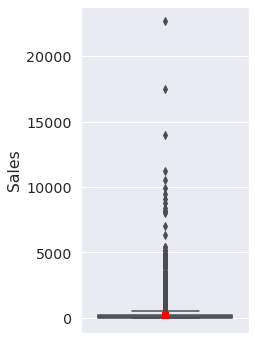

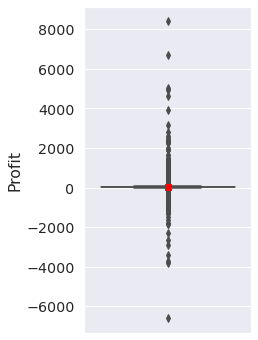

In [292]:
sns.set(font_scale=1.3,style="darkgrid")
plt.figure(figsize=(3,6))
sns.boxplot(y=df['Sales'],showmeans=True,meanprops={"marker":"s",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"red",
                      "markersize":"6"})

sns.set(font_scale=1.3,style="darkgrid")
plt.figure(figsize=(3,6))
sns.boxplot(y=df['Profit'],showmeans=True,meanprops={"marker":"s",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"red",
                      "markersize":"6"})

### Veficando as Pessoas 

In [293]:
df_orders.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returns,Waiting Time
0,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,no,4 days
1,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,no,4 days


In [294]:
df_people.head()

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


In [295]:
anna = df.loc[df['Customer Name']=='Anna Andreadi',:]
chuck = df.loc[df['Customer Name']=='Chuck Magee',:]
kelly = df.loc[df['Customer Name']=='Kelly Williams',:]
cassandra = df.loc[df['Customer Name']=='Cassandra Brandow',:]

pessoa = anna
pessoa = pessoa.append(chuck)
pessoa = pessoa.append(kelly)
pessoa = pessoa.append(cassandra)

In [296]:
person = ['Anna Andreadi', 'Chuck Magee', 'Kelly Williams', 'Cassandra Brandow']
pedidos = [len(anna), len(chuck), len(kelly), len(cassandra)]

Neste caso, Cassandra é a pessoa que mais realizou pedidos. No entando, com análise apenas do DataFrame, é possível ver que ela e os outros realizam pedidos em várias regiões diferentes.

Text(0, 0.5, 'Pedidos')

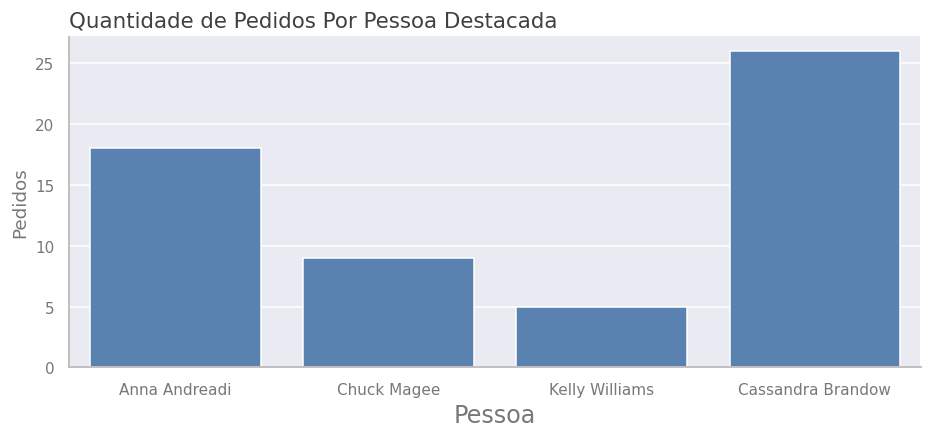

In [297]:
# Criando uma figure, axes
fig, ax = plt.subplots(figsize=(10,4), dpi=110)

# Criando o gráfico de barras 
sns.barplot(x=person, y=pedidos, ax=ax, color = '#4A81BF')

# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# # Modificar a cor dos eixos inferior e esquerdo para cinza
ax.spines['bottom'].set_color('#BFBEBE')
ax.spines['left'].set_color('#BFBEBE')

# Alinhar o texto
ax.set_title('Quantidade de Pedidos Por Pessoa Destacada', color = '#414040',loc='left', fontsize=14)

# Modificar a cor dos tiques para cinza (colocar uma cor menos intensa)
ax.tick_params(axis='both', colors ='#76787B',labelsize=10)

# Adicionar o label
ax.set_xlabel('Pessoa',color='#76787B')
ax.set_ylabel('Pedidos',color='#76787B',fontsize=12)

Para as compras dos produtos, estes clientes optam pela segunda classe para o envio.

[Text(0, 0, 'Standard\nClass'),
 Text(0, 0, 'First\nClass'),
 Text(0, 0, 'Same\nDay'),
 Text(0, 0, 'Second\nClass')]

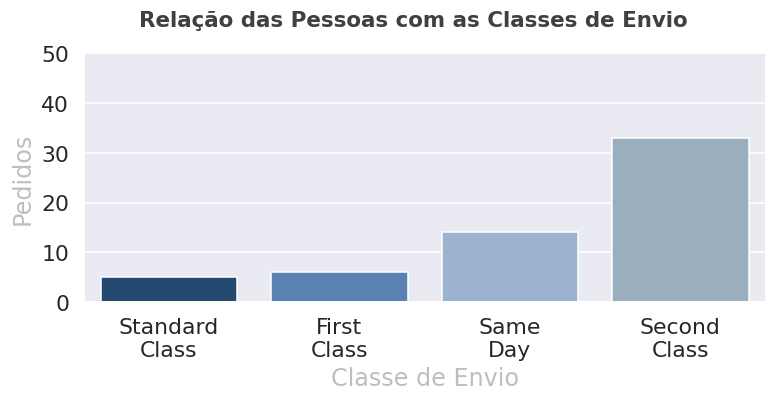

In [298]:
palette1 = ['#174A7E','#4A81BF','#94B2D7','#94AFC5','#03045e']  # paleta de cores usada

fig, ax = plt.subplots(figsize=(8,3),       # (largura, altura) em polegadas 
                       dpi=110)                                   # resolução (pontos/polegada)

fig.suptitle('Relação das Pessoas com as Classes de Envio', fontsize=14,y= 1.01,weight = 'bold', color = '#414040')

## Figura 1- Quantidade de envios por classe
## Informação:
d11 =  pessoa['Ship Mode'].value_counts()

## gráfico
sns.barplot(x=d11.index, y=pessoa['Ship Mode'],  palette=palette1, data=d11)
new_indices = [line.replace(' ','\n') for line in d11.index]
ax.axis(ymin=0,ymax=50)
ax.set_xlabel('Classe de Envio', color='#BFBEBE')
ax.set_ylabel('Pedidos', color='#BFBEBE')
ax.set_xticklabels(new_indices)

[Text(0, 0, 'Office\nSupplies'),
 Text(0, 0, 'Furniture'),
 Text(0, 0, 'Technology')]

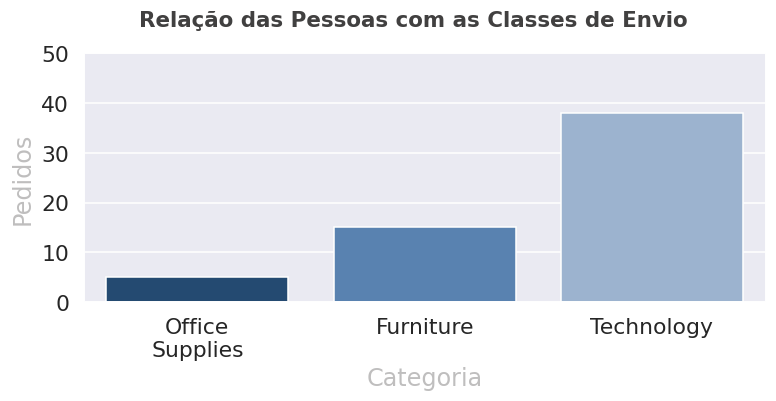

In [299]:
palette1 = ['#174A7E','#4A81BF','#94B2D7','#94AFC5','#03045e']  # paleta de cores usada

fig, ax = plt.subplots(figsize=(8,3),       # (largura, altura) em polegadas 
                       dpi=110)                                   # resolução (pontos/polegada)

fig.suptitle('Relação das Pessoas com as Classes de Envio', fontsize=14,y= 1.01,weight = 'bold', color = '#414040')

## Figura 1- Quantidade de envios por classe
## Informação:
d11 =  pessoa['Category'].value_counts()

## gráfico
sns.barplot(x=d11.index, y=pessoa['Category'],  palette=palette1, data=d11)
new_indices = [line.replace(' ','\n') for line in d11.index]
ax.axis(ymin=0,ymax=50)
ax.set_xlabel('Categoria', color='#BFBEBE')
ax.set_ylabel('Pedidos', color='#BFBEBE')
ax.set_xticklabels(new_indices)

A maior parte dos pedidos destes clientes é de tecnologia.

### Verificando as Devoluções

Existe um total de 8.7% de pedidos devolvidos.

Estes pedidos são, em grande parte, do sul e o tipo de envio é 'same day'.

O segmento mais afetado por estas devoluções é o segmento de tecnologia.



In [300]:
df['Returns'].value_counts()

no     9194
yes     800
Name: Returns, dtype: int64

In [301]:
perc = 800/9194
perc*100

8.701326952360235

Text(35.0, 0.5, 'Pedidos')

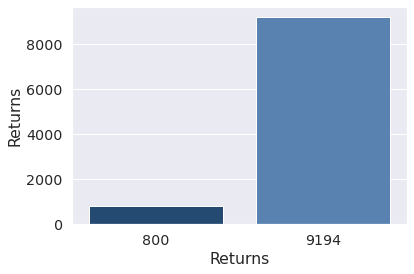

In [302]:
## Figura 1- Quantidade de envios por classe
## Informação:
ret = df['Returns'].value_counts()

## gráfico
sns.barplot(x=ret.index, y=df['Returns'],  palette=palette1, data=ret )
ax.axis(ymin=0,ymax=10000)
ax.set_title('Pedidos Devolvidos', color='#646369', loc='left', pad=15, fontsize=13, weight='bold')
ax.set_xlabel('Devoluções', color='#BFBEBE')
ax.set_ylabel('Pedidos', color='#BFBEBE')

#### Qual região teve mais devolução?

In [303]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returns,Waiting Time
0,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,no,4 days
1,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,no,4 days
2,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,no,4 days
3,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,no,4 days
4,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,no,7 days


Criação de um DataFrame de devoluções

In [304]:
ret = df.loc[df['Returns']=='yes',:]

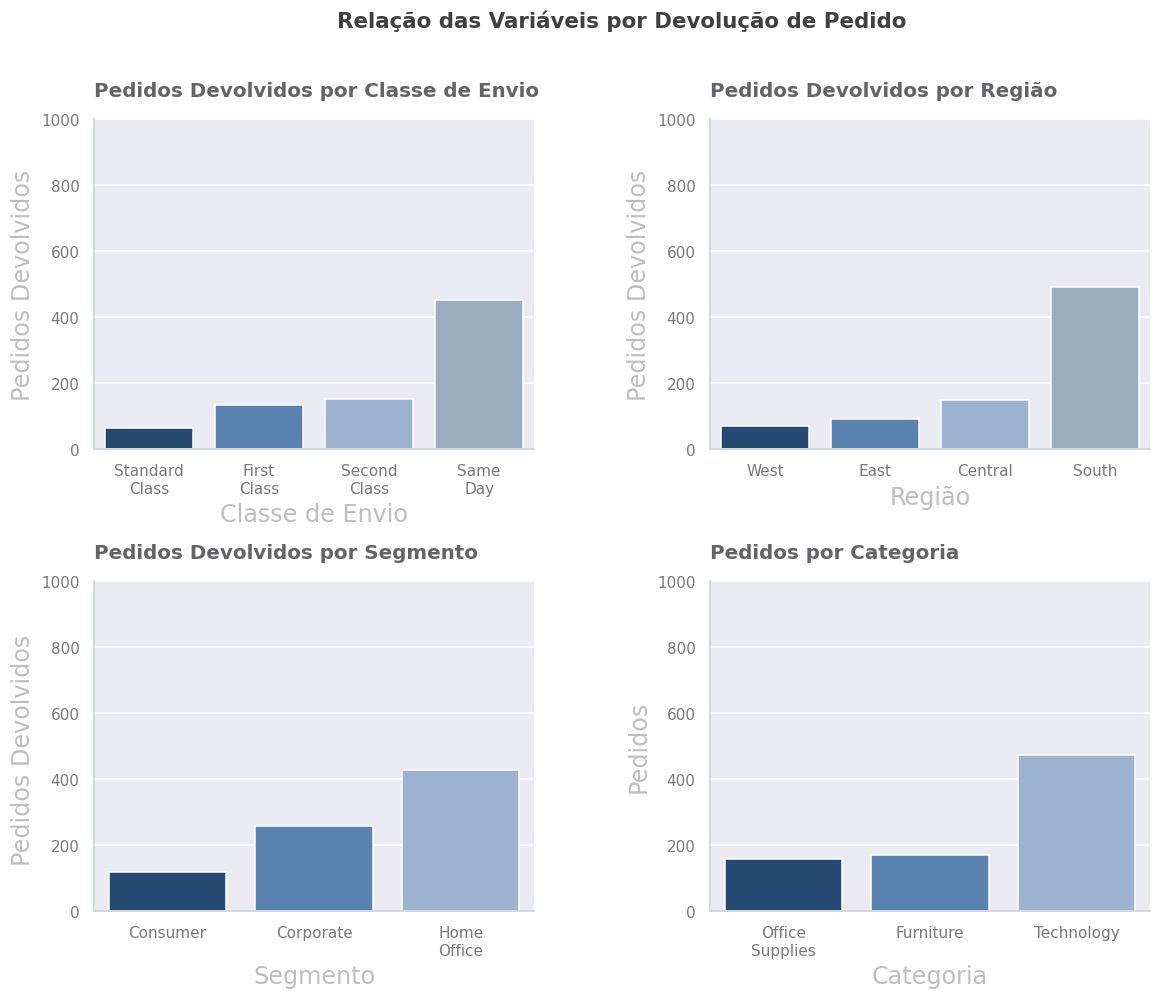

In [305]:
pos = [[0,0],[0,1],[1,0],[1,1]]   # posições dos gráficos
palette1 = ['#174A7E','#4A81BF','#94B2D7','#94AFC5','#03045e']  # paleta de cores usada

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(12,9),       # (largura, altura) em polegadas 
                       dpi=110)                                   # resolução (pontos/polegada)

fig.suptitle('Relação das Variáveis por Devolução de Pedido', fontsize=14,y= 1.01,weight = 'bold', color = '#414040')

## Figura 1- Quantidade de envios por classe
## Informação:
d11 = ret['Ship Mode'].value_counts()

## gráfico
sns.barplot(x=d11.index, y=ret['Ship Mode'],  palette=palette1, data=d11, ax=ax[0,0])
new_indices = [line.replace(' ','\n') for line in d11.index]
ax[0,0].axis(ymin=0,ymax=1000)
ax[0,0].set_title('Pedidos Devolvidos por Classe de Envio', color='#646369', loc='left', pad=15, fontsize=13, weight='bold')
ax[0,0].set_xlabel('Classe de Envio', color='#BFBEBE')
ax[0,0].set_ylabel('Pedidos Devolvidos', color='#BFBEBE')
ax[0,0].set_xticklabels(new_indices)

## Figura 2- Quantidade de pedidos por região
## Informação:
d22 = ret['Region'].value_counts()

## gráfico
sns.barplot(x=d22.index, y=ret['Region'],  palette=palette1, data=d22, ax=ax[0,1])
new_indices = [line.replace(' ','\n') for line in d22.index]
ax[0,1].axis(ymin=0, ymax=1000)
ax[0,1].set_title('Pedidos Devolvidos por Região', color='#646369', loc='left', pad=15, fontsize=13, weight='bold')
ax[0,1].set_xlabel('Região',color='#BFBEBE')
ax[0,1].set_ylabel('Pedidos Devolvidos',color='#BFBEBE')
ax[0,1].set_xticklabels(new_indices)

## Figura 3 - Quantidade de pedidos por Segmento
## Informação:
d33 = ret['Segment'].value_counts()

## gráfico
sns.barplot(x=d33.index, y=ret['Segment'],  palette=palette1, data=d33, ax=ax[1,0])
new_indices = [line.replace(' ','\n') for line in d33.index]
ax[1,0].axis(ymin=0, ymax=1000)
ax[1,0].set_title('Pedidos Devolvidos por Segmento', color='#646369', loc='left', pad=15, fontsize=13, weight='bold')
ax[1,0].set_xlabel('Segmento',color='#BFBEBE')
ax[1,0].set_ylabel('Pedidos Devolvidos ',color='#BFBEBE')
ax[1,0].set_xticklabels(new_indices)
ax[1,0].set_xticklabels(new_indices)

## Figura 4 - Quantidade de pedidos por Categoria
## Informação:
d4 = ret['Category'].value_counts()

## gráfico
sns.barplot(x=d4.index, y=ret['Category'],  palette=palette1, data=d4, ax=ax[1,1])
new_indices = [line.replace(' ','\n') for line in d4.index]
ax[1,1].axis(ymin=0, ymax=1000)
ax[1,1].set_title('Pedidos por Categoria', color='#646369', loc='left', pad=15, fontsize=13, weight='bold')
ax[1,1].set_xlabel('Categoria',color='#BFBEBE')
ax[1,1].set_ylabel('Pedidos',color='#BFBEBE')
ax[1,1].set_xticklabels(new_indices)


### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines

fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

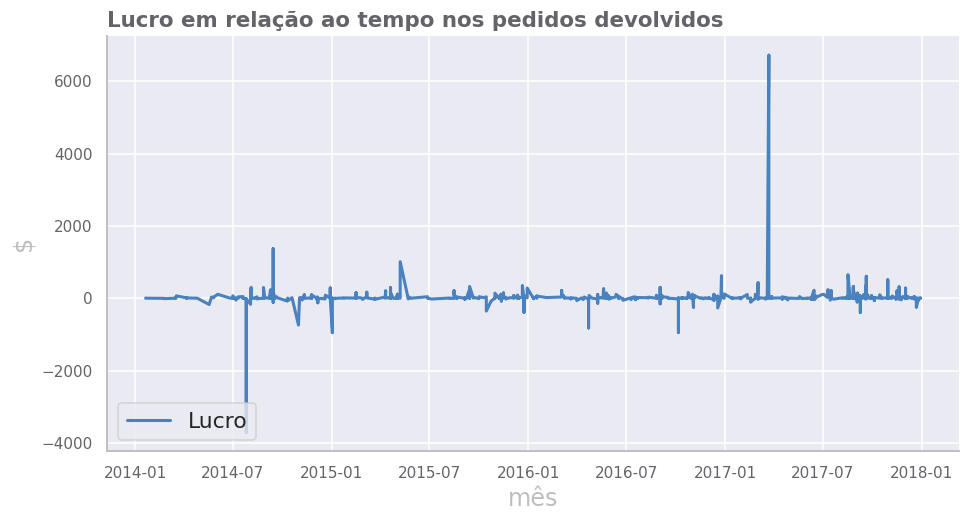

In [306]:
# Gráfico de Linhas - Uma série temporal

# ---------------------------------------------------------------------------------------
#                             Elementos básicos:
# ---------------------------------------------------------------------------------------

# 1 - Figure e axis
# Criando a variável fig e a variável ax   (figura, eixos):               
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5),  # (largura, altura) em polegadas 
                       dpi=110)
# 2 - Gráfico de linhas - coluna Mês (x), Lucro (y) de df1 
ax.plot('Order Date', 'Profit', data=ret, color='#4A81BF', lw=2, label='Lucro')
plt.legend(loc='lower left')

# 3 - Título
ax.set_title('Lucro em relação ao tempo nos pedidos devolvidos', color = '#646369',loc='left', fontsize=14, weight='bold')


# 4 - Adicionar o label
ax.set_xlabel('mês',color='#BFBEBE')
ax.set_ylabel('$',color='#BFBEBE')

# ---------------------------------------------------------------------------------------
#                    Melhorando o aspecto do gráfico:
# ---------------------------------------------------------------------------------------

# 5 - Modificar a cor dos tiques para cinza (colocar uma cor menos intensa)
ax.tick_params(axis='both', colors ='#646369',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines 


# 6 - Modificar os eixos (linhas) - mais simples, mais fácil de assimilar

## Deixar invisível os eixos superior e direito   
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Modificar a cor dos eixos inferior e esquerdo para cinza
ax.spines['bottom'].set_color('#BFBEBE')
ax.spines['left'].set_color('#BFBEBE')


###### Considerações Finais

A empresa aponta grande quantidade de vendas no período informado, no entanto também tem bastante prejuízo, em grande parte feitos a partir de devoluções.

Seria interessante verificar dentro de um mapa dos Estados Unidos com um gráfico de dispersão a quantidade de pedidos feitos e a quantidade de pedidos devolvidos em cada Estado. 

Outro ponto a se pensar é procurar métodos que possam retirar os *outliers* de forma a conseguir enxergar um melhor padrão das vendas, lucro e prejuízo. 

Fazendo esta retirada, poderia ser proposto um modelo de previsão usando séries temporais ou machine learning para prever as vendas e prejuízos em cada um dos segmento afim de estruturar uma melhor estratégia para empresa. 
